In [0]:
import pandas as pd
import numpy as np

# Imports para algoritmo DBSCAN
from sklearn.cluster import DBSCAN

# Imports para algoritmo SpectralClustering
from sklearn.cluster import SpectralClustering

from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files

uploaded = files.upload() # then browse, select the files. It's then uploaded

Saving data1.txt to data1.txt


In [4]:
!ls

data1.txt  sample_data


In [0]:
# Load cluster data

X = np.loadtxt('data1.txt')

# X = StandardScaler().fit_transform(X)

In [4]:
# Compute SpectralClustering

spc = SpectralClustering(n_clusters=6,
                        # eigen_solver='arpack', # {None, ‘arpack’, ‘lobpcg’, or ‘amg’}
                        kernel_params='', # chi2_kernel
                        assign_labels= 'kmeans', # {‘kmeans’, ‘discretize’}
                        affinity="nearest_neighbors").fit(X) #‘nearest_neighbors’, ‘precomputed’, ‘rbf’ or
# cosine_similarity, Linear kernel,  Polynomial kernel, Sigmoid kernel,  RBF kernel,  Laplacian kernel, 
# Chi-squared kernel


# Hiperparameters
# Affinity matrix construction: distance and kernel;
# kernel parameter (scaling factor);
# number of clusters k;
# clustering method

core_samples_mask = np.zeros_like(spc.labels_, dtype=bool)
#core_samples_mask[spc.core_sample_indices_] = True

labels = spc.labels_

n_clusters_ =  len(set(labels)) - (1 if -1 in labels else 0)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


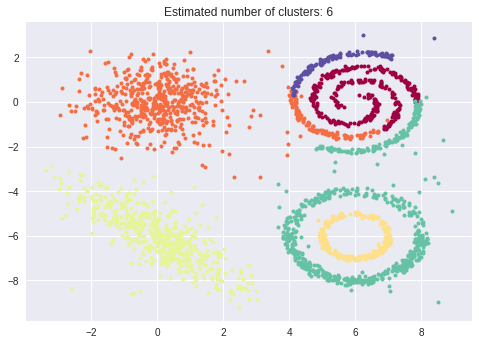

In [5]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['figure.figsize']= (8, 6)
plt.show()
plt.savefig('test.png')
files.download('test.png')